# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [41]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [42]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [43]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [44]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [45]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [61]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: https://contest.yandex.ru/contest/19551/run-report/36822879/
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/36822702/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/36823011/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/36828318/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/36906936/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [65]:
import pandas as pd
df = pd.read_csv('autos.csv')

In [66]:
df.sample(5)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
222190,volkswagen,touran,bus,automatik,diesel,nein,140,150000,2007,5,2016-03-05 00:00:00,2016-03-18 02:45:36,89415,11500
227981,suzuki,andere,kombi,manuell,benzin,ja,103,150000,2001,2,2016-03-26 00:00:00,2016-04-02 12:16:04,99976,750
61606,ford,mondeo,kombi,manuell,diesel,nein,131,150000,2002,8,2016-03-22 00:00:00,2016-03-23 20:18:25,49809,1990
87378,bmw,3er,limousine,manuell,benzin,nein,105,90000,1999,5,2016-03-28 00:00:00,2016-03-30 03:15:33,94522,4450
6960,skoda,octavia,kombi,manuell,diesel,nein,105,150000,2006,11,2016-03-09 00:00:00,2016-03-10 14:37:26,60437,4350


In [67]:
df.nunique()

brand                      39
model                     250
vehicleType                 8
gearbox                     2
fuelType                    7
notRepairedDamage           2
powerPS                   496
kilometer                  13
yearOfRegistration         85
monthOfRegistration        13
dateCreated               107
lastSeen               129878
postalCode               8070
price                    4951
dtype: int64

In [69]:
df['notRepairedDamage'] = df['notRepairedDamage'].apply(lambda x: True if x == 'ja' else False) # шпрахен зе дётч

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

%matplotlib inline

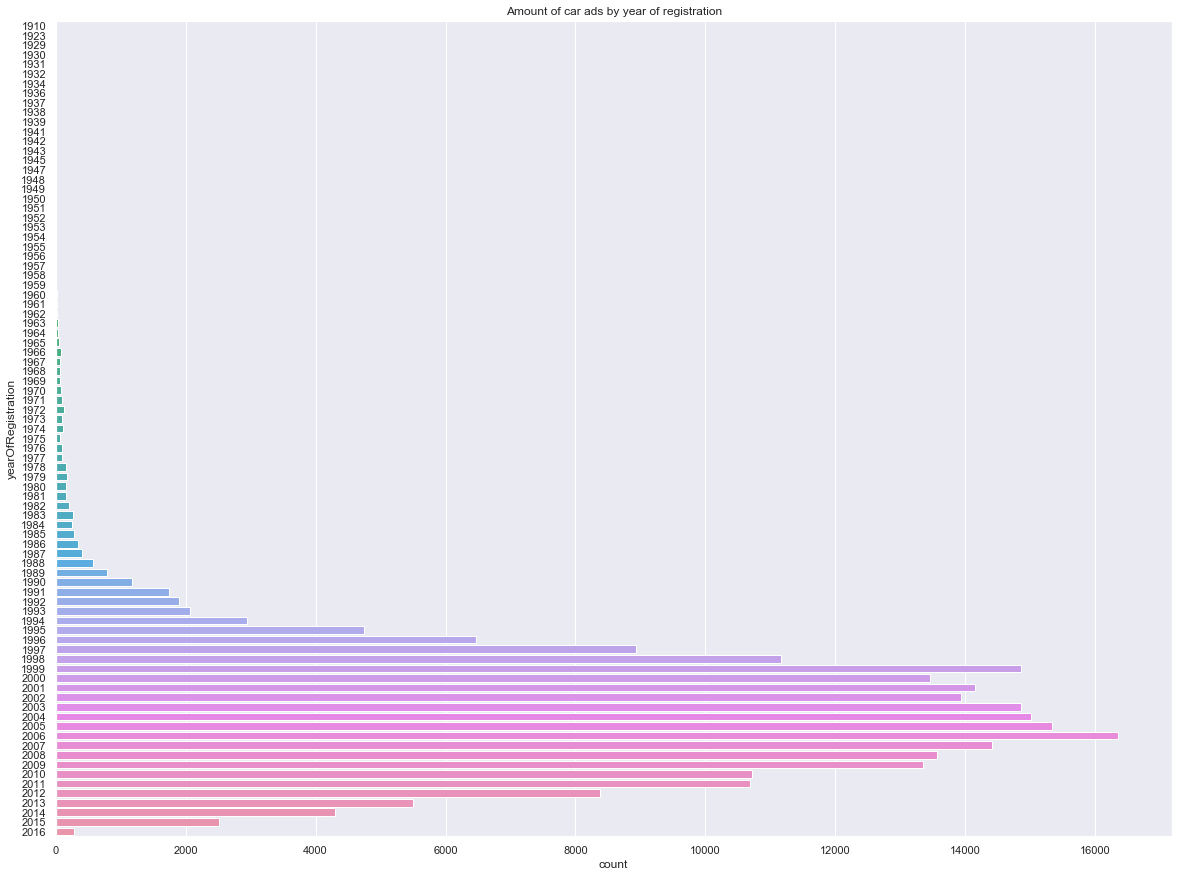

In [86]:
# посмотрим на то, сколько машин каждого года продают
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.countplot(y='yearOfRegistration', data=df)
ax.set_title('Amount of car ads by year of registration')
plt.show()

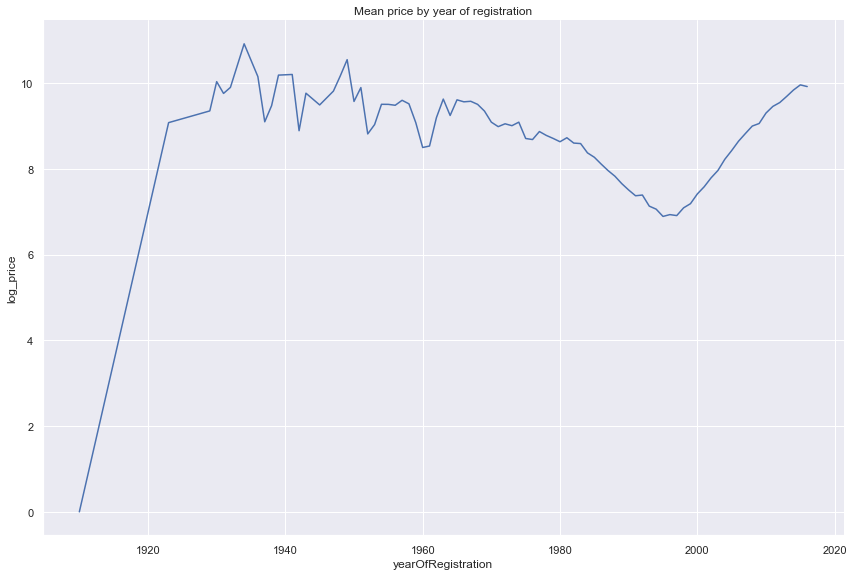

In [90]:
# у нас есть очень старые машины
# что-то мне подсказывает, что они могут стоить очень много, но в остальном прайс линейно зависит от года регистрации
# посмотрим на то, как выглядит средняя цена на автомобиль, зарегистрированный в k-ом году 
# сразу рассмотрим логарифм, потому что потом поменяем таргет на него

df['log_price'] = np.log(df['price'])
g = sns.relplot(x='yearOfRegistration', y='log_price', data=df.groupby('yearOfRegistration').mean().reset_index(),
                kind='line', height=8, aspect=1.5)
g.axes[0,0].set_title('Mean price by year of registration')
plt.show()

In [97]:
# думаю тут такой перекос из-за того, что автомобилей до 1950 года продаётся не так много
# а чел который выложил объявление от 1920 года ценой в 1 у.е. просто рофлер, этот пример мы вообще удалим
df.drop(df[df['yearOfRegistration'] <= 1920].index, inplace=True)

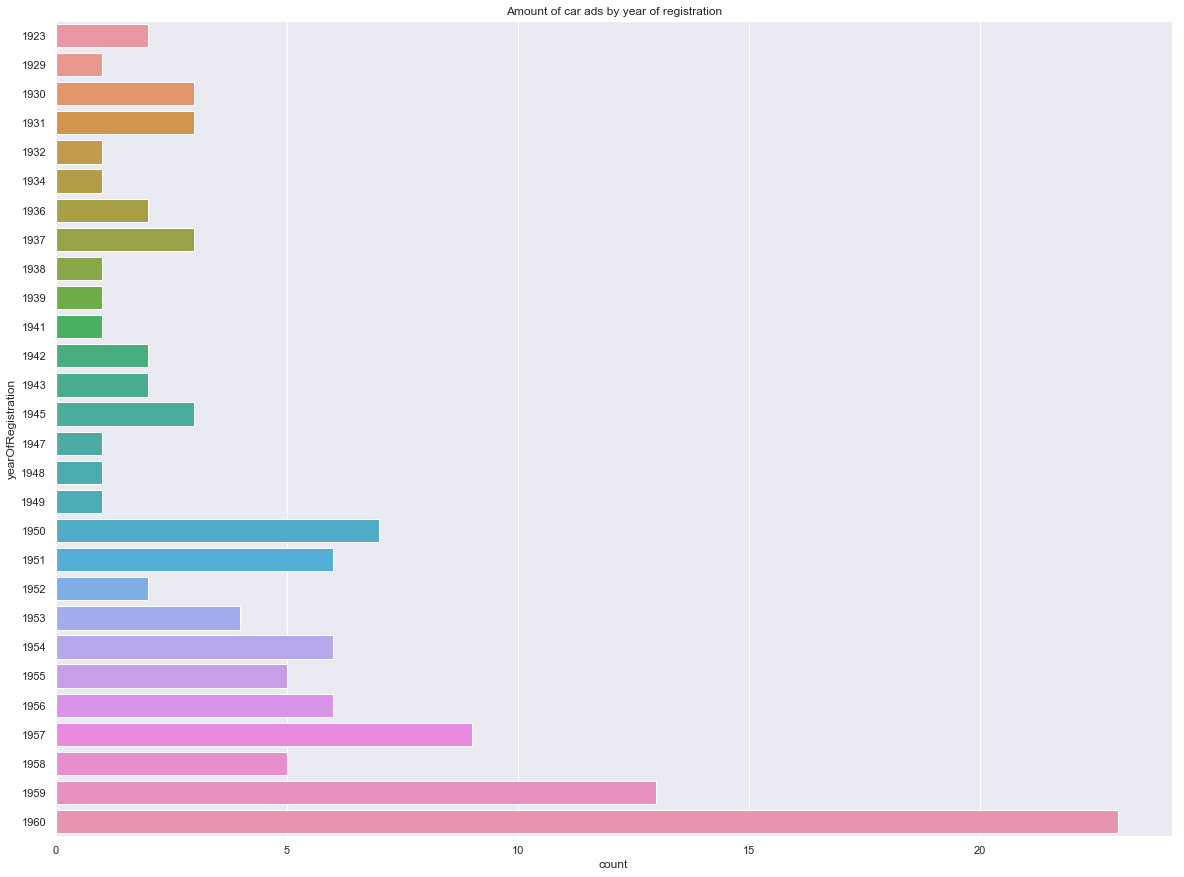

In [98]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.countplot(y='yearOfRegistration', data=df[df['yearOfRegistration'] <= 1960])
ax.set_title('Amount of car ads by year of registration')
plt.show()

In [89]:
# собственно так всё и есть
# есть идея ввести бинарный признак is_old для всех машин до 1960 года
# предполагаю, что он будет повышать стоимость для раритетных автомобилей
df['is_old'] = df['yearOfRegistration'].apply(lambda x: True if x <= 1960 else False)

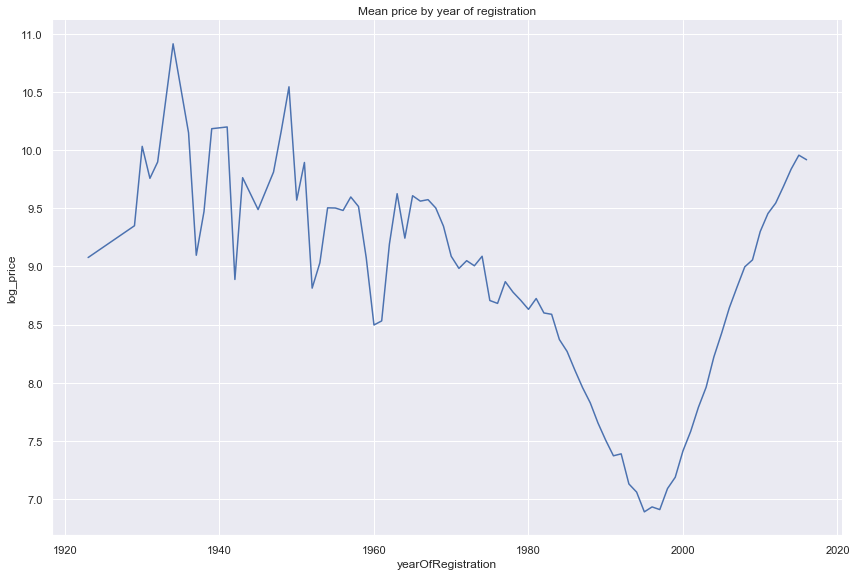

In [99]:
# взглянем ещё раз на распределение логарифма прайса от года регистрации, уже после того как удалили выброс
g = sns.relplot(x='yearOfRegistration', y='log_price', data=df.groupby('yearOfRegistration').mean().reset_index(),
                kind='line', height=8, aspect=1.5)
g.axes[0,0].set_title('Mean price by year of registration')
plt.show()

In [100]:
# видно, что с 1980 по н.в. таргет ведёт себя как две линейных функции
# можно было бы посчитать что-нибудь типа abs(yearofRegistration - 1995) как новый признак, 
# но поскольку я опять сел за дз в последний вечер этого я делать не буду

In [102]:
# postal code может быть полезным признаком (в разных регионах ценообразование может быть разным)
# тут стоило бы посмотреть на то как устроены почтовые коды в Германии (?) и на основе этого поделить всё на регионы
# но опять же я не успеваю этого сделать, поэтому просто дропнем этот признак
# дата создания и lastSeen вообще кажутся мне бесполезными, их тоже дропнем
df.drop(columns=['dateCreated', 'lastSeen', 'postalCode', 'price'], inplace=True)

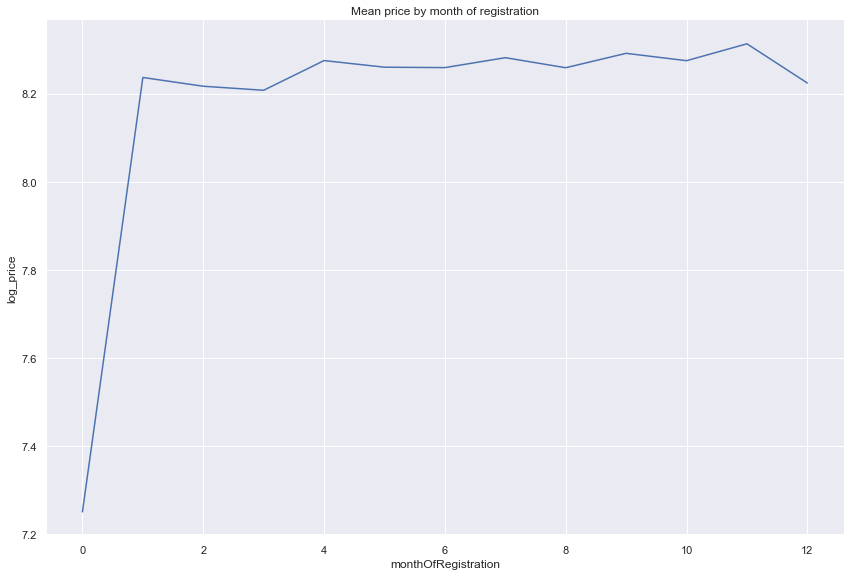

In [106]:
# разберёмся с месяцом регистрации. есть ощущение, что он не особо роляет
g = sns.relplot(x='monthOfRegistration', y='log_price', data=df.groupby('monthOfRegistration').mean().reset_index(),
                kind='line', height=8, aspect=1.5)
g.axes[0,0].set_title('Mean price by month of registration')
plt.show()

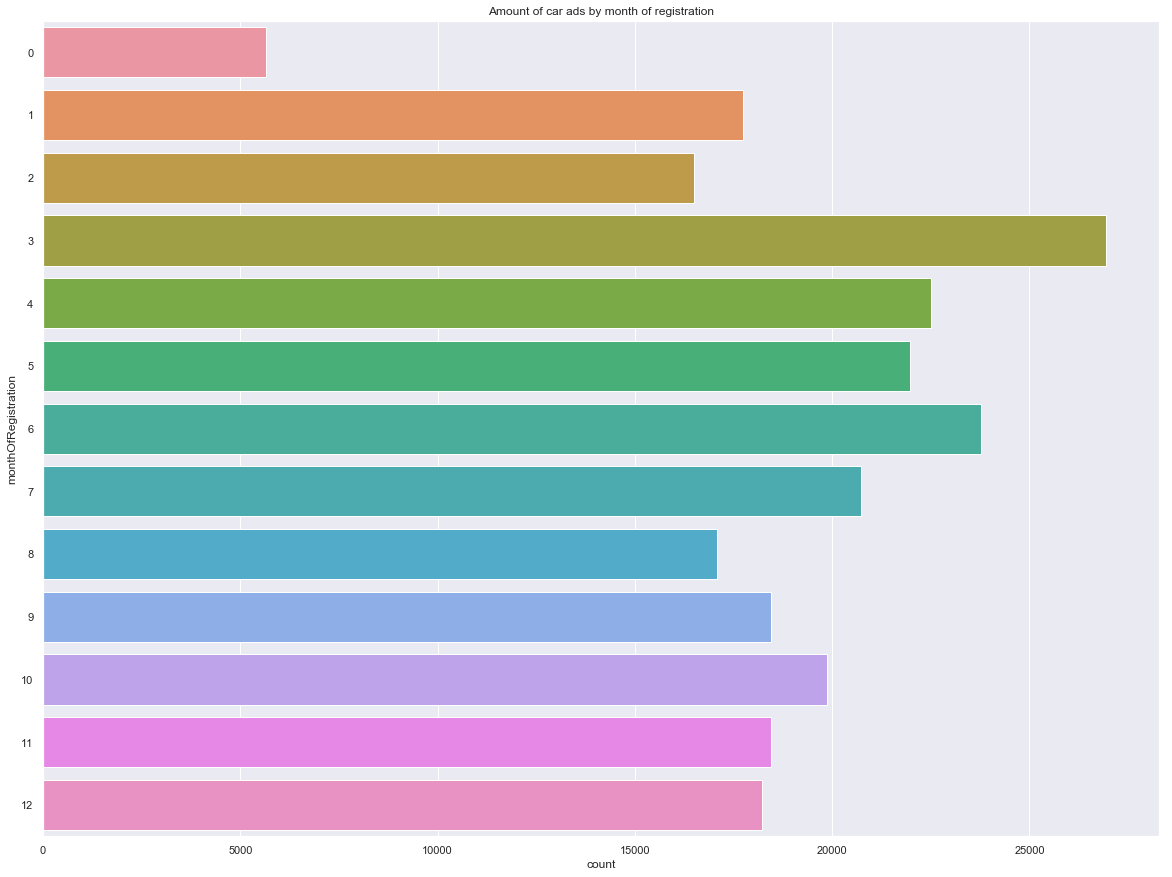

In [107]:
# я не оч понимаю почему месяцев 13. скорее всего это тоже какой-то выброс
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.countplot(y='monthOfRegistration', data=df)
ax.set_title('Amount of car ads by month of registration')
plt.show()

In [108]:
# как я понял если месяц == 0, то это равносильно тому что нет инфы
# в остальном в среднем по месяцам всё +- ровно, поэтому месяц тоже дропнем, он кажется бесполезным
df.drop(columns='monthOfRegistration', inplace=True)

In [109]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,is_old,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,False,75,150000,2001,False,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,False,69,90000,2008,False,8.188689
2,bmw,3er,limousine,manuell,benzin,True,102,150000,1995,False,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,False,109,150000,2004,False,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,False,105,150000,2004,False,7.600902


In [140]:
# категориальные закодируем ванхотом. категориальные: brand, model, vehicleType, gearbox, fuelType, notRepairedDamage, is_old
# числовые отскейлим: powerPS, kilometer, yearOfRegistration
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'is_old']
numeric = ['powerPS', 'kilometer', 'yearOfRegistration']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
    ('scaling', StandardScaler(), numeric),
])

In [141]:
# понятно что фит_трансформ надо делать на тренировочной выборке
from sklearn.model_selection import train_test_split

y = df['log_price']
X = df.drop(columns='log_price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [142]:
print(y_train.shape, y_test.shape, y_val.shape)

(148722,) (49575,) (49574,)


Всё ок

In [143]:
X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)
X_test = column_transformer.transform(X_test)

In [149]:
X_train.shape

(148722, 312)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [150]:
w0 = np.zeros(X_train.shape[1])

lin_reg = LinearRegression(descent=GradientDescent(w0=w0, lambda_ = 1))

In [172]:
from sklearn.metrics import mean_squared_error

logspace = np.logspace(-2, 0.5, 20)


descents = [GradientDescent, StochasticDescent, MomentumDescent, Adagrad]
lambdas = list()
models = list()

for descent in descents:
    best_error = np.inf
    best_lmbd = None
    best_model = None
    for lmbd in logspace:
        lin_reg = LinearRegression(descent=descent(w0=w0, lambda_=lmbd))
        lin_reg.fit(X_train, y_train.values)
        predict_val = lin_reg.predict(X_val)
        error_val = mean_squared_error(y_val, predict_val)
        if error_val < best_error:
            best_error = error_val
            best_model = lin_reg
            best_lmbd = lmbd
            
    lambdas.append(best_lmbd)
    models.append(best_model)
    print('Descent: {}, lambda: {}, MSE: {}'.format(descent, best_lmbd, best_error))

Descent: <class 'utils.GradientDescent'>, lambda: 1.725210549942041, MSE: 0.4396966508375048
Descent: <class 'utils.StochasticDescent'>, lambda: 0.06158482110660264, MSE: 2.027472687015147
Descent: <class 'utils.MomentumDescent'>, lambda: 1.725210549942041, MSE: 0.4405992584727486
Descent: <class 'utils.Adagrad'>, lambda: 1.725210549942041, MSE: 0.3952156001236737


In [175]:
from sklearn.metrics import r2_score

descents = ['Full GD', 'Stochastic GD', 'Momentum GD', 'Adagrad']
for i in range(len(descents)):
    print('Descent: {}'.format(descents[i]))
    model = models[i]
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print('MSE. Train: {}, test: {}'.format(mean_squared_error(train_pred, y_train), mean_squared_error(test_pred, y_test)))
    print('R2. Train: {}, test: {}'.format(r2_score(y_train, train_pred), r2_score(y_test, test_pred)))
    print('Iterations: {}\n'.format(len(model.loss_history)))

Descent: Full GD
MSE. Train: 0.4250752002842882, test: 0.41402084370973075
R2. Train: 0.6909396619937034, test: 0.7014767694631499
Iterations: 82

Descent: Stochastic GD
MSE. Train: 2.0486525201249566, test: 2.0366773355963663
R2. Train: -0.4895181838503351, test: -0.46851422342802684
Iterations: 6

Descent: Momentum GD
MSE. Train: 0.4258636447393295, test: 0.4148281690939351
R2. Train: 0.6903664059919152, test: 0.7008946601673289
Iterations: 63

Descent: Adagrad
MSE. Train: 0.3742982841745088, test: 0.3585080052966603
R2. Train: 0.7278581433478504, test: 0.7415034302246029
Iterations: 45



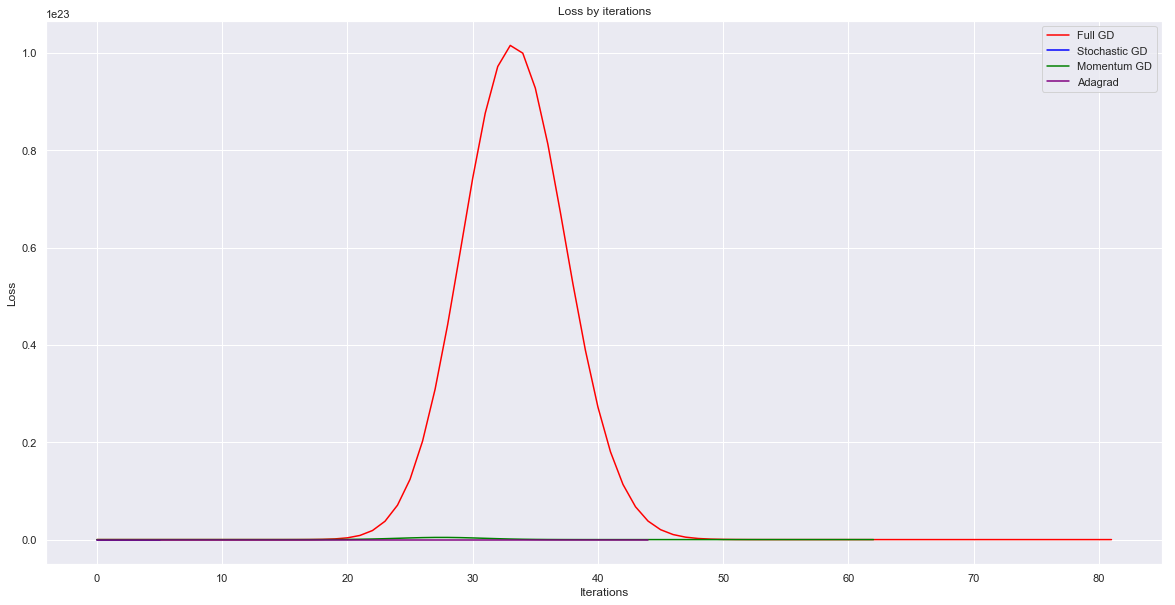

In [189]:
fig, ax = plt.subplots(figsize=(20, 10))
colors = ['red', 'blue', 'green', 'purple']
for i in range(len(colors)):
    ax.plot(models[i].loss_history, label=descents[i], color=colors[i])
ax.set(xlabel='Iterations', ylabel='Loss')
ax.set_title('Loss by iterations')

plt.legend()
plt.show()

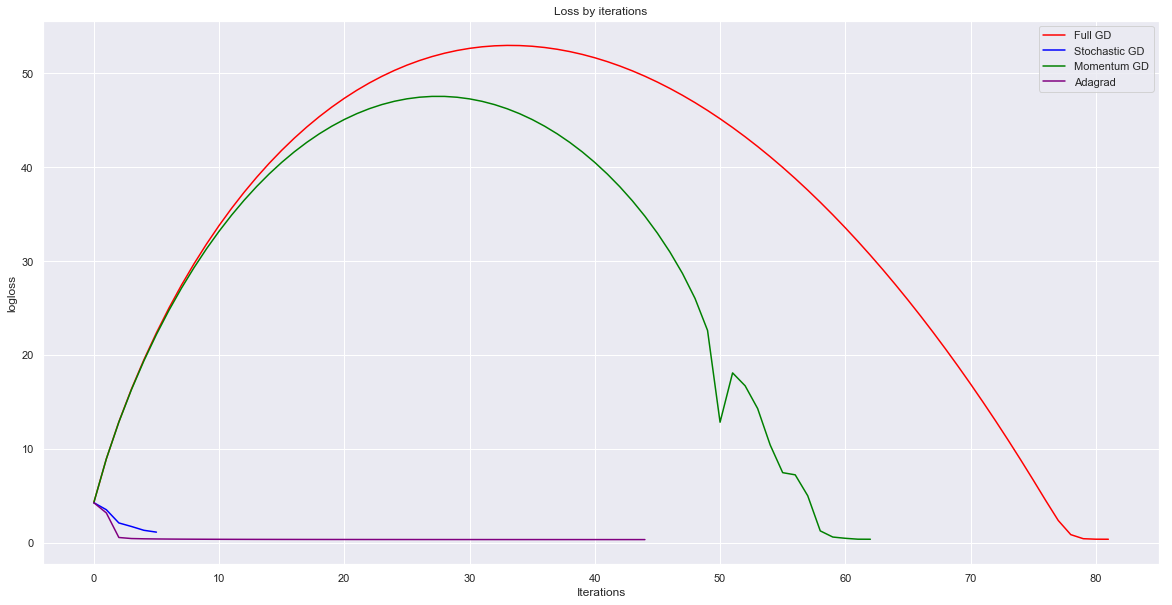

In [188]:
# что-то ничего не видно, построим логарифм ошибки
fig, ax = plt.subplots(figsize=(20, 10))
colors = ['red', 'blue', 'green', 'purple']
for i in range(len(colors)):
    ax.plot(np.log1p(models[i].loss_history), label=descents[i], color=colors[i])
ax.set(xlabel='Iterations', ylabel='logloss')
ax.set_title('Loss by iterations')

plt.legend()
plt.show()

Могу сказать, что СГД очень нестабилен (надо лучше подбирать гиперпараметры для него)

Адаград показывает себя лучше всего

Моментум как полный ГД, но побыстрее

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [197]:
from time import time
batch_sizes = np.arange(5, 500, 10)

times = [[] for i in range(len(batch_sizes))]
steps = [[] for i in range(len(batch_sizes))]

k = 10

for j in range(len(batch_sizes)):
    for i in range(k):
        b_size = batch_sizes[j]
        sgd = StochasticDescent(w0=w0, lambda_=lambdas[1], batch_size=b_size)
        linreg = LinearRegression(descent=sgd)
        start = time()
        linreg.fit(X_train, y_train.values)
        exec_time = time() - start
        times[j].append(exec_time)
        steps[j].append(len(linreg.loss_history))

In [201]:
for i in range(len(batch_sizes)):
    print('Batch =', batch_sizes[i])
    print('Time. Mean: {}, variance: {}'.format(np.average(times[i]), np.var(times[i])))
    print('Steps. Mean: {}, variance: {}'.format(np.average(steps[i]), np.var(steps[i])))

Batch = 5
Time. Mean: 0.290920615196228, variance: 0.006429724759257738
Steps. Mean: 16.2, variance: 21.56
Batch = 15
Time. Mean: 0.37513160705566406, variance: 0.007582631506727467
Steps. Mean: 15.4, variance: 3.04
Batch = 25
Time. Mean: 0.4634241104125977, variance: 0.016222657340076694
Steps. Mean: 16.3, variance: 2.41
Batch = 35
Time. Mean: 0.6431345224380494, variance: 0.029637486839772575
Steps. Mean: 16.1, variance: 2.6900000000000004
Batch = 45
Time. Mean: 0.4404937267303467, variance: 0.007432072589201652
Steps. Mean: 16.2, variance: 2.1599999999999997
Batch = 55
Time. Mean: 0.30417118072509763, variance: 0.0006138711768608118
Steps. Mean: 16.8, variance: 1.56
Batch = 65
Time. Mean: 0.30220043659210205, variance: 0.0009371815767082126
Steps. Mean: 16.6, variance: 2.8400000000000007
Batch = 75
Time. Mean: 0.29616522789001465, variance: 0.00289977767598657
Steps. Mean: 15.8, variance: 1.56
Batch = 85
Time. Mean: 0.2821758508682251, variance: 0.00047541727148029626
Steps. Mean: 1

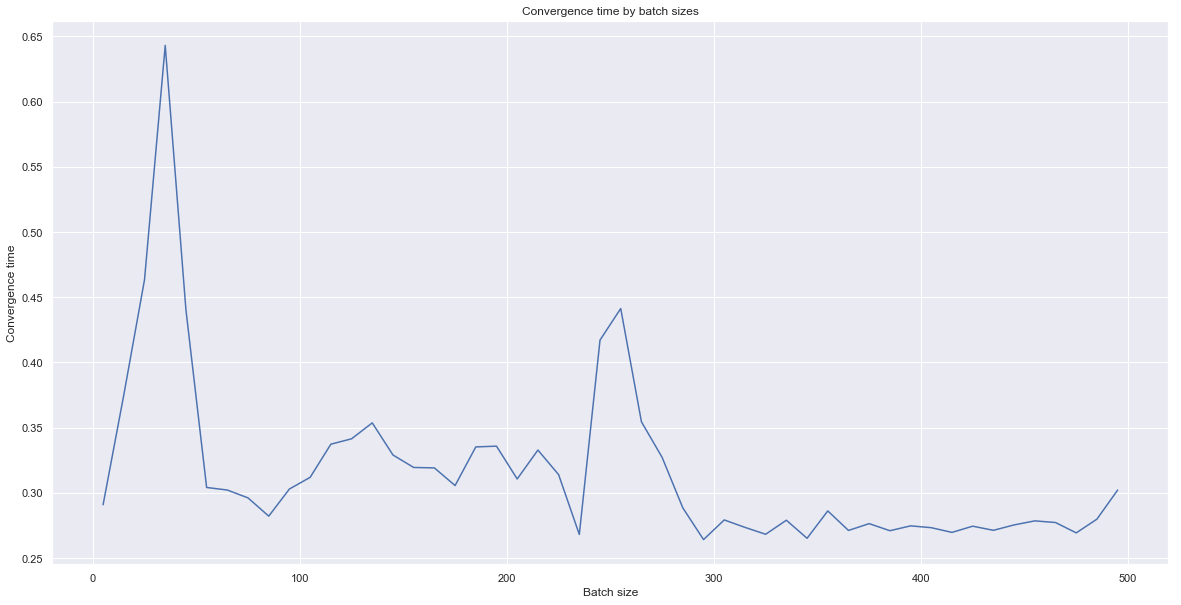

In [213]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(batch_sizes, [np.average(t) for t in times])
ax.set(xlabel='Batch size', ylabel='Convergence time')
ax.set_title('Convergence time by batch sizes')
plt.show()

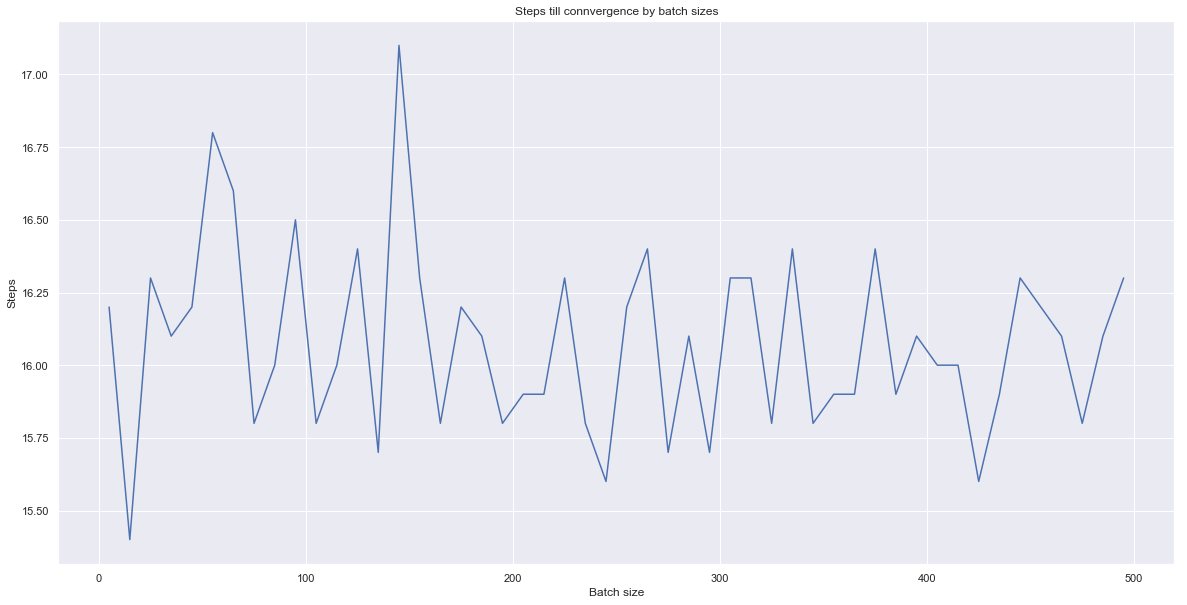

In [214]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(batch_sizes, [np.average(t) for t in steps])
ax.set(xlabel='Batch size', ylabel='Steps')
ax.set_title('Steps till connvergence by batch sizes')
plt.show()

Если посмотреть на время и количество, то, кажется, лучше всего взять размер батча в районе 80. Если меньше, то СГД, кажется, слишком нестабилен. При этом если брать больше, то шагов меньше не становится, но при этом на них тратится больше времени

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{1}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [224]:
import warnings
warnings.simplefilter("ignore")

In [231]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

w0 = np.zeros(X_train.shape[1])

mus_logspace = np.logspace(-5, -1, 15)

lambdas_reg = list()
mus_reg = list()
models_reg = list()

descents = (
    GradientDescentReg,
    StochasticDescentReg,
    MomentumDescentReg,
    AdagradReg,
)

# я понимаю что скорее всего не совсем корректно пользоваться лямбдой подобранной без регуляризации
# но мой комп отказывается считать перебор по двум параметрам сразу

for i in range(len(descents)):
    descent = descents[i]
    best_error = np.inf
    best_model = None
    lmbd = lambdas[i]
    best_mu = None
    for mu in mus_logspace:
        print('mu {} started'.format(mu))
        lin_reg = LinearRegression(descent=descent(w0=w0, lambda_=lmbd, mu=mu))
        lin_reg.fit(X_train, y_train.values)
        predict_val = lin_reg.predict(X_val)
        try:
            error_val = mean_squared_error(y_val, predict_val)
        except ValueError:
            continue
            # overflow
        if error_val < best_error:
            best_error = error_val
            best_model = lin_reg
            best_mu = mu
    print('Descent: {}, lambda: {}, mu: {}, MSE: {}'.format(descent, best_lmbd, best_mu, error_val))
    mus_reg.append(best_mu)
    models_reg.append(best_model)

mu 1e-05 started
mu 1.9306977288832496e-05 started
mu 3.727593720314938e-05 started
mu 7.196856730011514e-05 started
mu 0.00013894954943731373 started
mu 0.00026826957952797245 started
mu 0.0005179474679231213 started
mu 0.001 started
mu 0.0019306977288832496 started
mu 0.003727593720314938 started
mu 0.007196856730011514 started
mu 0.013894954943731374 started
mu 0.026826957952797246 started
mu 0.05179474679231207 started
mu 0.1 started
Descent: <class 'utils.GradientDescentReg'>, lambda: 1.3894954943731375, mu: 1e-05, MSE: 0.5217773558287382
mu 1e-05 started
mu 1.9306977288832496e-05 started
mu 3.727593720314938e-05 started
mu 7.196856730011514e-05 started
mu 0.00013894954943731373 started
mu 0.00026826957952797245 started
mu 0.0005179474679231213 started
mu 0.001 started
mu 0.0019306977288832496 started
mu 0.003727593720314938 started
mu 0.007196856730011514 started
mu 0.013894954943731374 started
mu 0.026826957952797246 started
mu 0.05179474679231207 started
mu 0.1 started
Descent:

In [258]:
descents_reg = (
    GradientDescentReg,
    StochasticDescentReg,
    MomentumDescentReg,
    AdagradReg,
)

descents = (
    'GradientDescent',
    'StochasticDescent',
    'MomentumDescent',
    'Adagrad',
)

for i in range(len(descents)):
    print(descents[i])
    test_reg = models_reg[i].predict(X_test)
    test_no_reg = models[i].predict(X_test)
    print('MSE. With reg: {}, without: {}'.format(mean_squared_error(test_reg, y_test), mean_squared_error(test_no_reg, y_test)))
    print('R2. With reg: {}, without: {}'.format(r2_score(y_test, test_reg), r2_score(y_test, test_no_reg)))
    print()

GradientDescent
MSE. With reg: 0.41400716794655984, without: 0.41402084370973075
R2. With reg: 0.701486630157518, without: 0.7014767694631499

StochasticDescent
MSE. With reg: 2.1581544941386595, without: 2.0366773355963663
R2. With reg: -0.5561034217871001, without: -0.46851422342802684

MomentumDescent
MSE. With reg: 0.4148301065447902, without: 0.4148281690939351
R2. With reg: 0.7008932631988016, without: 0.7008946601673289

Adagrad
MSE. With reg: 0.359056503222726, without: 0.3585080052966603
R2. With reg: 0.7411079444046988, without: 0.7415034302246029



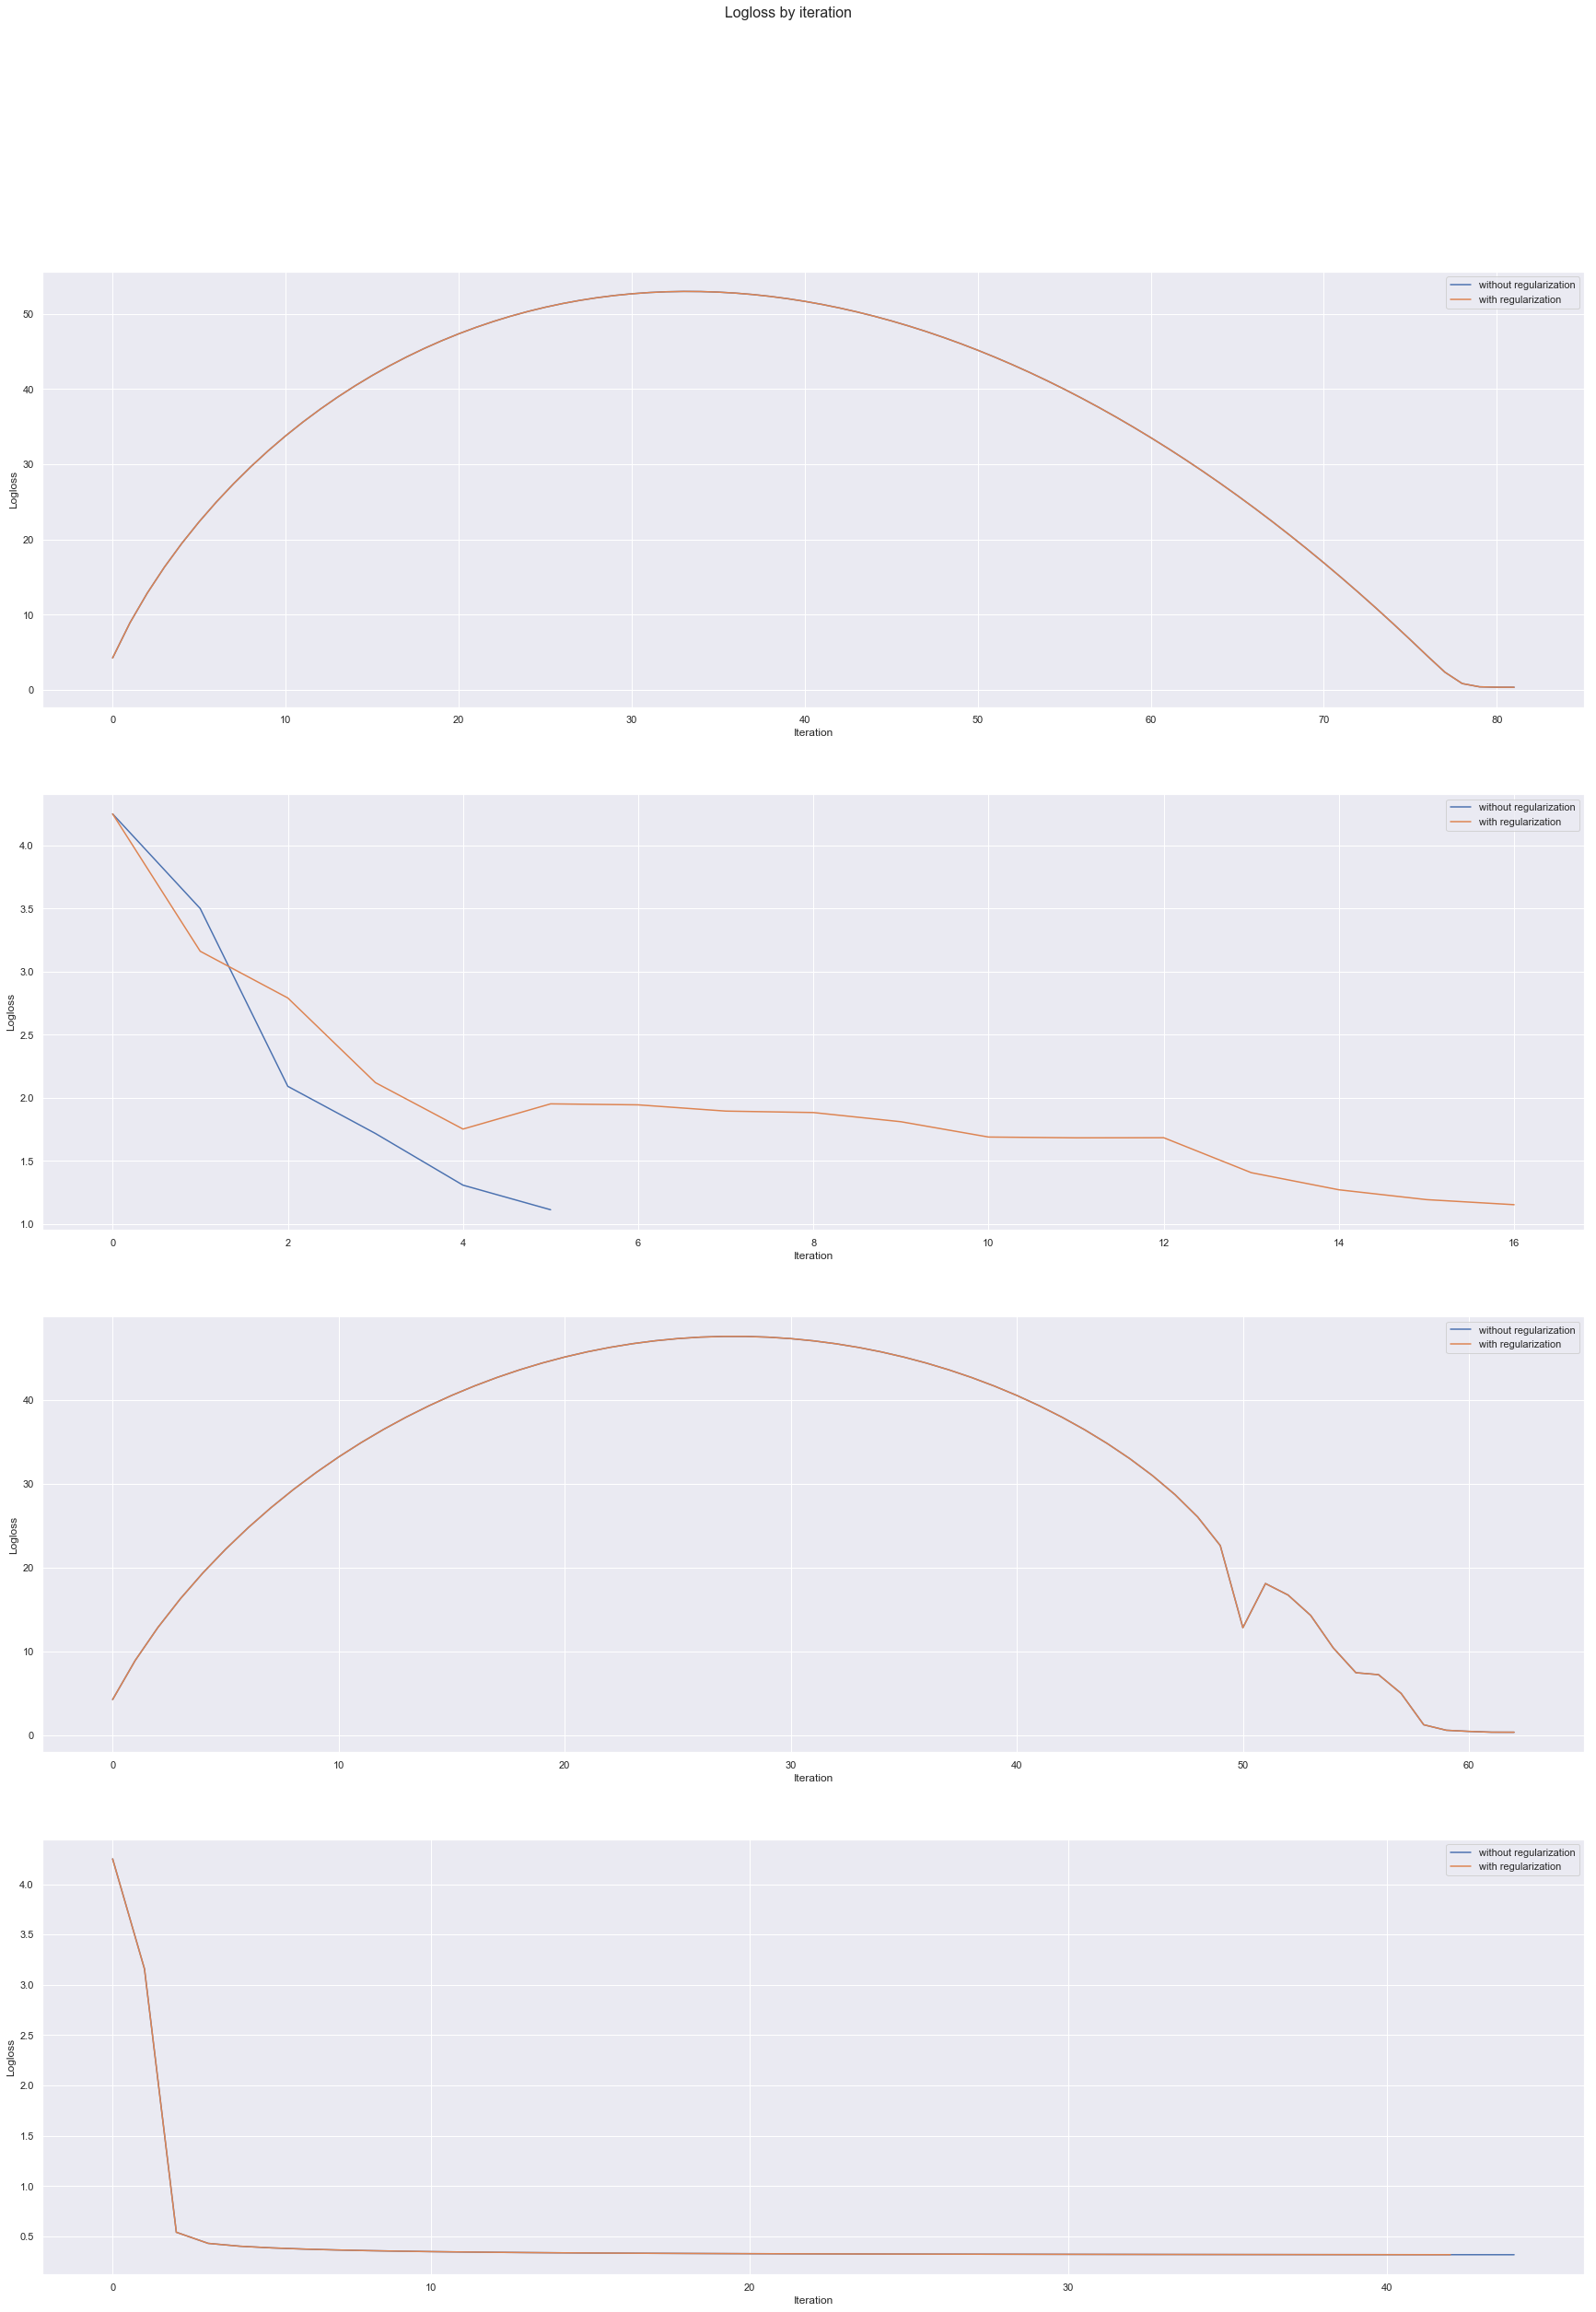

In [282]:
fig, axs = plt.subplots(4, 1, figsize=(30, 40))
for i in range(4):
    axs[i].plot(np.log1p(models[i].loss_history), label='without regularization')
    axs[i].plot(np.log1p(models_reg[i].loss_history), label='with regularization')
    axs[i].set(xlabel='Iteration', ylabel='Logloss')
    axs[i].legend()
plt.suptitle('Logloss by iteration', fontsize=16)
plt.show()

Вероятно это я в чем-то налажал, но здесь разве что увеличисло количество шагов в СГД, в остальном мало что поменялось

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [ ]:
# YOUR CODE:

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

<img src=https://www.pokeroff.ru/media/cache/cover_full/29033711456963953.jpg>